


# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : ObsInfo Experiment with Open AI Prompt Engineering

---

# Observations et environnement
---

## Environnement

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [4]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

In [5]:
sheet_id = '1rVgAnv7FwFqWUUmjE72AP_YEmf9v6DaZ-_20jZ6MKTg'
range_name = 'Sélection'

df_obsinfo2307 = gs.read_df(sheet_id,range_name)
df_obsinfo2307

,url_h,url_labelizer,title,comment
0,c13175936764a345ec21bc398fe750a41496078e,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,très long mais bien formaté
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",source visible
2,361a904687dd4b1abb189717de7341ce162d21c7,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,ok
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",source visible
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",ok
...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,bizarre
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,donne la source
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,ok
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,donne la source


In [6]:
import patat.util.file

filename = 'data/prod/230713-Corpus.pickle'

df_corpus = patat.util.file.pickle_load(filename)

In [7]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb()
df_corpus = article_db.df().copy()

In [8]:
df_obsinfo2307 = pd.merge(df_obsinfo2307['url_h'],df_corpus)

In [9]:
df_obsinfo2307

,url_h,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox
0,c13175936764a345ec21bc398fe750a41496078e,https://lesakerfrancophone.fr/la-relation-entr...,lesakerfrancophone.fr,La relation entre la technologie et la religion,NaN,Le Saker Francophone,"juillet 3, 2022",[],[Par Austin Cline − Le 27 fevrier 2019 − Sourc...,2022-07-03T10:00:27+02:00,NaN,29274.0,66.0,0.5
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://www.breizh-info.com/2021/01/27/157958/...,www.breizh-info.com,"Confinement. Les habitants de Brest, Morlaix e...",NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 janvier 2021,"['BREST', 'CARHAIX', 'MORLAIX', 'alcool', 'bre...","[Dans le cadre du Dry January, opération comme...",2021-01-27T00:00:00,NaN,2669.0,13.0,0.5
2,361a904687dd4b1abb189717de7341ce162d21c7,https://reseauinternational.net/la-chine-le-pr...,reseauinternational.net,La Chine : Le premier marché mondial de Smartp...,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",[Le marché des GSM Chinois a évolué en quelque...,NaN,NaN,2993.0,9.0,0.5
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://lezarceleurs.blogspot.com/2021/12/emma...,lezarceleurs.blogspot.com,"Emmanuel à Olivier : « Tiens bon, on les aura ...",NaN,NaN,NaN,[],[De : https://lemediaen442.fr/emmanuel-a-olivi...,NaN,NaN,3202.0,10.0,0.5
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://lesakerfrancophone.fr/selon-ubs-les-pr...,lesakerfrancophone.fr,"Selon UBS, les « propriétés d’assurance tant d...",NaN,jmarti,"mars 23, 2022",[],[Par Birch Gold Group − Le 17 février 2022 − S...,2022-03-23T10:00:25+01:00,NaN,10070.0,33.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://lemediaen442.fr/loi-climat-le-gouverne...,lemediaen442.fr,Loi climat : le gouvernement va exempter Amazo...,NaN,NaN,22 juin 2021,"['Mot-clés : amazon', 'Posté dans Économie, En...",[La majorité LREM s’apprête une fois de plus à...,2021-06-22T13:35:07+02:00,NaN,2766.0,10.0,0.5
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://www.breizh-info.com/2017/11/10/81481/q...,www.breizh-info.com,Le QI peut-il être augmenté par l’éducation ? ...,NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t10 novembre 2017,"['Santé', 'Intelligence', 'Intelligence humain...",[10/11/2017 – 08h00 Édimbourg (Breizh-Info.com...,2017-11-10T00:00:00,NaN,3885.0,10.0,0.5
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://lesmoutonsrebelles.com/secte-sexuelle-...,lesmoutonsrebelles.com,Secte sexuelle : l’ex-star de Smallville Aliso...,NaN,NaN,NaN,[],"[Ce mercredi 15 septembre, le site américain T...",NaN,NaN,1903.0,5.0,0.5
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://lesalonbeige.fr/sacre-de-charles-iii-p...,lesalonbeige.fr,Sacre de Charles III par SAR le Prince Charles...,"Cet article est une tribune libre, non rédigée...",Par aquart61,9 mai 2023,[Tribune libre],"[Cet article est une tribune libre, non rédigé...",2023-05-09T08:35:20+02:00,,NaN,NaN,0.5


## Constitution textes

In [10]:
import patat.imp.parser

In [11]:
parser = patat.imp.parser.Parser()

In [12]:
def make_text(row):
    return parser.text_from_data(row['title'], row['abstract'], row['paragraphs'])
    

In [13]:
df_obsinfo2307['text']=df_obsinfo2307.apply(make_text,axis=1)

In [14]:
df_obsinfo2307

,url_h,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox,text
0,c13175936764a345ec21bc398fe750a41496078e,https://lesakerfrancophone.fr/la-relation-entr...,lesakerfrancophone.fr,La relation entre la technologie et la religion,NaN,Le Saker Francophone,"juillet 3, 2022",[],[Par Austin Cline − Le 27 fevrier 2019 − Sourc...,2022-07-03T10:00:27+02:00,NaN,29274.0,66.0,0.5,La relation entre la technologie et la religio...
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://www.breizh-info.com/2021/01/27/157958/...,www.breizh-info.com,"Confinement. Les habitants de Brest, Morlaix e...",NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 janvier 2021,"['BREST', 'CARHAIX', 'MORLAIX', 'alcool', 'bre...","[Dans le cadre du Dry January, opération comme...",2021-01-27T00:00:00,NaN,2669.0,13.0,0.5,"Confinement. Les habitants de Brest, Morlaix e..."
2,361a904687dd4b1abb189717de7341ce162d21c7,https://reseauinternational.net/la-chine-le-pr...,reseauinternational.net,La Chine : Le premier marché mondial de Smartp...,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",[Le marché des GSM Chinois a évolué en quelque...,NaN,NaN,2993.0,9.0,0.5,La Chine : Le premier marché mondial de Smartp...
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://lezarceleurs.blogspot.com/2021/12/emma...,lezarceleurs.blogspot.com,"Emmanuel à Olivier : « Tiens bon, on les aura ...",NaN,NaN,NaN,[],[De : https://lemediaen442.fr/emmanuel-a-olivi...,NaN,NaN,3202.0,10.0,0.5,"Emmanuel à Olivier : « Tiens bon, on les aura ..."
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://lesakerfrancophone.fr/selon-ubs-les-pr...,lesakerfrancophone.fr,"Selon UBS, les « propriétés d’assurance tant d...",NaN,jmarti,"mars 23, 2022",[],[Par Birch Gold Group − Le 17 février 2022 − S...,2022-03-23T10:00:25+01:00,NaN,10070.0,33.0,0.5,"Selon UBS, les « propriétés d’assurance tant d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://lemediaen442.fr/loi-climat-le-gouverne...,lemediaen442.fr,Loi climat : le gouvernement va exempter Amazo...,NaN,NaN,22 juin 2021,"['Mot-clés : amazon', 'Posté dans Économie, En...",[La majorité LREM s’apprête une fois de plus à...,2021-06-22T13:35:07+02:00,NaN,2766.0,10.0,0.5,Loi climat : le gouvernement va exempter Amazo...
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://www.breizh-info.com/2017/11/10/81481/q...,www.breizh-info.com,Le QI peut-il être augmenté par l’éducation ? ...,NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t10 novembre 2017,"['Santé', 'Intelligence', 'Intelligence humain...",[10/11/2017 – 08h00 Édimbourg (Breizh-Info.com...,2017-11-10T00:00:00,NaN,3885.0,10.0,0.5,Le QI peut-il être augmenté par l’éducation ? ...
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://lesmoutonsrebelles.com/secte-sexuelle-...,lesmoutonsrebelles.com,Secte sexuelle : l’ex-star de Smallville Aliso...,NaN,NaN,NaN,[],"[Ce mercredi 15 septembre, le site américain T...",NaN,NaN,1903.0,5.0,0.5,Secte sexuelle : l’ex-star de Smallville Aliso...
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://lesalonbeige.fr/sacre-de-charles-iii-p...,lesalonbeige.fr,Sacre de Charles III par SAR le Prince Charles...,"Cet article est une tribune libre, non rédigée...",Par aquart61,9 mai 2023,[Tribune libre],"[Cet article est une tribune libre, non rédigé...",2023-05-09T08:35:20+02:00,,NaN,NaN,0.5,Sacre de Charles III par SAR le Prince Charles...


In [18]:
cols = ['url','url_h','site','title','text']

In [19]:
df_obsinfo2307[cols].to_csv('data/tmp/230830-obsinfo2307.csv',index=False)

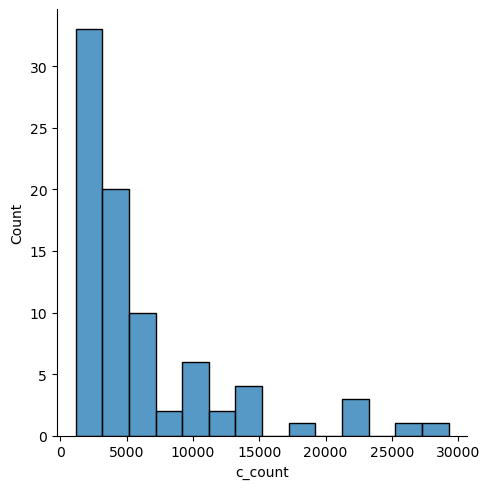

In [15]:
sns.displot(df_obsinfo2307,x='c_count')

# Experience
---

## Openai models

In [22]:
import os
import openai

In [23]:
openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")

In [25]:
models = openai.Model.list()

In [28]:
for model in models.data:
    print(model.id)

text-davinci-edit-001
text-search-curie-query-001
code-davinci-edit-001
gpt-3.5-turbo-16k-0613
curie-instruct-beta
text-curie-001
davinci-similarity
text-similarity-curie-001
text-ada-001
text-embedding-ada-002
ada-code-search-text
babbage
text-search-ada-query-001
babbage-search-query
ada-similarity
gpt-3.5-turbo
curie
whisper-1
text-search-ada-doc-001
text-search-babbage-query-001
code-search-ada-code-001
curie-search-document
text-search-davinci-query-001
text-search-curie-doc-001
gpt-3.5-turbo-0301
babbage-search-document
babbage-code-search-text
text-davinci-003
gpt-3.5-turbo-16k
davinci-instruct-beta
davinci-search-query
text-babbage-001
ada
text-similarity-babbage-001
text-davinci-002
code-search-babbage-text-001
text-search-davinci-doc-001
code-search-ada-text-001
text-davinci-001
ada-search-query
text-similarity-ada-001
ada-code-search-code
davinci-search-document
curie-search-query
babbage-similarity
ada-search-document
text-similarity-davinci-001
davinci
curie-similarity
gpt

## Test Gpt class

In [29]:
import patat.model.gpt

In [30]:
importlib.reload(patat.model.gpt)

<module 'patat.model.gpt' from '/Volumes/Geek/Work/Patat/patat/model/gpt.py'>

In [31]:
gpt = patat.model.gpt.Gpt()

In [33]:
gpt._chat_model = 'gpt-3.5-turbo-16k-0613'

In [38]:
text = df_obsinfo2307.sort_values('c_count',ascending=False).iloc[0]['text']

In [40]:
len(text)

28872

## Tests de prompts

In [42]:
_model = 'gpt-3.5-turbo-16k-0613'

In [44]:
def ask_gpt_chat(prompt, system_context=''):
    messages = []
    if system_context :
        messages.append({"role": "system", "content": system_context})
    question = {}
    question['role'] = 'user'
    question['content'] = prompt
    messages.append(question)
    response =  openai.ChatCompletion.create(model=_model,messages=messages,
            temperature=0,
#            max_tokens=512,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
    return response['choices'][0]['message']['content']

In [45]:
prompt = 'Raconte moi une blague'

In [46]:
ask_gpt_chat(prompt)

'Bien sûr ! Voici une blague pour vous :\n\nPourquoi les plongeurs plongent-ils toujours en arrière et jamais en avant ?\n\nParce que sinon ils tombent dans le bateau !'

In [50]:
consigne = """
Nous allons te poser des questions dans le cadre d'une expérience où tes réponses seront comparées à des réponses humaines.
Il s'agit de classifer des textes selon une liste de labels prédéfinis.
Pour chacun tes labels, tu répondras 1 pour oui ou 0 pour non.
Les labels sont les suivants :
- infox : contient au moins un fait qui est décrit ou insinué, et qui est faux ou dont la description est exagérée
- lieux, dates et personnes : Mentionne au moins un lieu, une date ou une personne 
- faits : Décrit au moins un fait (un état de chose ou événement, qui peut être vrai ou faux)
- opinions : Formule au moins une opinion 
- subjectif : L’article présente plus des opinions que des faits, 
- propos rapporté : Le contenu de l'article est rapporté par une autre personne ou une autre source, donc l’article est “indirect”, 
- sources citées : Une source d'information (identifiable) est citée, pour un fait au moins
- fausse nouvelle : Un fait décrit dans l’article est faux 
- insinuations : L'article laisse à penser un fait sans le dire explicitement 
- exagération : L’article exagère un fait réel, 
- titre décalé : Le titre est trompeur et ne reflète pas correctement le contenu de l’article
En outre, tu donneras un commentaire sur les annotations.
"""

In [51]:
def gpt35_annotate(text):
    prompt = f'{consigne}\nVoici le texte à analyser :\n{text}'
    return ask_gpt_chat(prompt)

In [52]:
gpt35_annotate(text)

"- infox : 0\n- lieux, dates et personnes : 0\n- faits : 1\n- opinions : 1\n- subjectif : 1\n- propos rapporté : 0\n- sources citées : 0\n- fausse nouvelle : 0\n- insinuations : 0\n- exagération : 0\n- titre décalé : 0\n\nCommentaire : Ce texte explore la relation entre la technologie et la religion, en suggérant que la technologie peut être motivée par des aspirations religieuses de transcendance. L'auteur souligne également que la technologie ne résout pas nécessairement les problèmes humains et que la poursuite de la transcendance peut être problématique. Le texte présente des faits, des opinions et un ton subjectif. Il ne contient pas de fausses nouvelles, d'insinuations, d'exagérations ou de titres décalés."

## Annotation par gpt-3.5

In [53]:
gpt35_text = []

In [58]:
for index,row in df_obsinfo2307.iterrows():
    print(index,row['title'])
    gpt35_text.append({
        'url_h':row['url_h'],
        'title':row['title'],
        'gpt35-labels': gpt35_annotate(row['text']),
    })

0 La relation entre la technologie et la religion


In [60]:
item0 = gpt35_text.pop(99)

In [63]:
gpt35_text.insert(0,item0)

In [76]:
gpt35_text

[{'url_h': 'c13175936764a345ec21bc398fe750a41496078e',
  'title': 'La relation entre la technologie et la religion',
  'gpt35-labels': "- infox : 0\n- lieux, dates et personnes : 0\n- faits : 1\n- opinions : 1\n- subjectif : 1\n- propos rapporté : 0\n- sources citées : 0\n- fausse nouvelle : 0\n- insinuations : 0\n- exagération : 0\n- titre décalé : 0\n\nCommentaire : Ce texte explore la relation entre la technologie et la religion, en suggérant que la technologie peut être motivée par des aspirations religieuses de transcendance. L'auteur souligne également que la technologie ne résout pas nécessairement les problèmes humains et que la poursuite de la transcendance peut être problématique. Le texte présente des faits, des opinions et un ton subjectif. Il ne contient pas de fausses nouvelles, d'insinuations, d'exagérations ou de titres décalés."},
 {'url_h': '0552561b3c46f64febfbc3a77c301f085a98b966',
  'title': 'Confinement. Les habitants de Brest, Morlaix et Carhaix invités à répondr

In [57]:
gpt35_text_sav = gpt35_text

In [106]:
df_gpt = pd.DataFrame(gpt35_text)

In [107]:
df_gpt

,url_h,title,gpt35-labels
0,c13175936764a345ec21bc398fe750a41496078e,La relation entre la technologie et la religion,"- infox : 0\n- lieux, dates et personnes : 0\n..."
1,0552561b3c46f64febfbc3a77c301f085a98b966,"Confinement. Les habitants de Brest, Morlaix e...","infox: 0\nlieux, dates et personnes: 1\nfaits:..."
2,361a904687dd4b1abb189717de7341ce162d21c7,La Chine : Le premier marché mondial de Smartp...,"- infox : 0\n- lieux, dates et personnes : 1\n..."
3,433b403d386d5eba5dff7d45044cdb0fe7862972,"Emmanuel à Olivier : « Tiens bon, on les aura ...",Voici les annotations pour le texte donné :\n\...
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,"Selon UBS, les « propriétés d’assurance tant d...","- infox : 0\n- lieux, dates et personnes : 0\n..."
...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,Loi climat : le gouvernement va exempter Amazo...,"infox: 0\nlieux, dates et personnes: 1\nfaits:..."
96,14ed4715949dc7767359674df1a076bb1e0e417b,Le QI peut-il être augmenté par l’éducation ? ...,"infox: 0\nlieux, dates et personnes: 1\nfaits:..."
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,Secte sexuelle : l’ex-star de Smallville Aliso...,"infox: 0\nlieux, dates et personnes: 1\nfaits:..."
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,Sacre de Charles III par SAR le Prince Charles...,"infox: 0\nlieux, dates et personnes: 1\nfaits:..."


In [117]:
def split_gpt_response(text):
    text = normalize_gpt_text(text)
    lines = text.split('\n')
    response = {}
    for line in lines:
        items = line.split(':')
        if len(items)==2:
            response[items[0].strip()]=items[1].strip(' ')
    return response

In [118]:
def normalize_gpt_text(text):
    text = text.replace('Voici les réponses pour chaque label :\n\n- ','')
    text = text.replace('Voici les annotations pour le texte donné :\n\n- ','')
    text = text.replace('Voici les réponses aux questions :\n\n- ','')
    text = text.replace('Voici les réponses aux labels pour le texte donné :\n\n- ','')
#    text = text.replace('Commentaire sur les annotations :\n\n- ','')
    text = text.replace('les informations fournies, voici les réponses aux différentes questions','')  
    text = text.replace('-','')
    return text

In [119]:
text = df_gpt.loc[0,'gpt35-labels']

In [120]:
gpt_labels = df_gpt['gpt35-labels'].apply(split_gpt_response)

In [121]:
df_obs_gpt = pd.concat([df_obsinfo2307,pd.DataFrame(list(gpt_labels))],axis=1)

In [126]:
df_obs_gpt[['Commentaire sur les annotations','Annotations','Labels','Commentaires']].notna()

,Commentaire sur les annotations,Annotations,Labels,Commentaires
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [129]:
df_obs_gpt[df_obs_gpt['Labels'].notna()]

,url_h,url,site,title,article,author,date,tags,paragraphs,date_iso,...,sources citées,fausse nouvelle,insinuations,exagération,titre décalé,Commentaire,Commentaire sur les annotations,Annotations,Labels,Commentaires
62,a683d5c8af68ea94a9a9f47c5fedaab12ea865c6,https://lesdeqodeurs.fr/les-affaires-benghazi/,lesdeqodeurs.fr,Pilule Rouge : Les affaires Benghazi,NaN,NaN,15/10/2020,[],"[Extrait du live du 13 octobre 2020, « Benghaz...",2020-10-15T00:00:00,...,0,0,1,1,0,NaN,NaN,NaN,,
70,f236dfa94a48623ad448ffa4e58266480b213e3b,https://lesakerfrancophone.fr/quelques-remarqu...,lesakerfrancophone.fr,Quelques remarques sur l’Ukraine et les médias,NaN,Wayan,"août 16, 2022",[],"[Par Moon of Alabama – Le 15 août 2022, Permet...",2022-08-16T08:00:37+02:00,...,0,0,0,0,0,NaN,,NaN,,NaN


# Sauvegarde des résultats
---

In [115]:
df_obs_gpt.to_csv('data/tmp/230801-Gpt.csv')

In [130]:
df_gpt.to_csv('data/tmp/230801-Gpt-raw.csv')

# Conclusions
---

# Bricolages
---

In [49]:
import os
import openai

In [50]:
openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")


In [145]:
model_list = openai.Model.list()

In [146]:
[model['id'] for model in model_list['data']]

['whisper-1',
 'babbage',
 'text-davinci-003',
 'davinci',
 'text-davinci-edit-001',
 'babbage-code-search-code',
 'text-similarity-babbage-001',
 'code-davinci-edit-001',
 'text-davinci-001',
 'ada',
 'babbage-code-search-text',
 'babbage-similarity',
 'gpt-3.5-turbo-16k-0613',
 'code-search-babbage-text-001',
 'text-curie-001',
 'gpt-3.5-turbo-0301',
 'gpt-3.5-turbo-16k',
 'code-search-babbage-code-001',
 'text-ada-001',
 'text-similarity-ada-001',
 'curie-instruct-beta',
 'ada-code-search-code',
 'ada-similarity',
 'code-search-ada-text-001',
 'text-search-ada-query-001',
 'davinci-search-document',
 'ada-code-search-text',
 'text-search-ada-doc-001',
 'davinci-instruct-beta',
 'text-similarity-curie-001',
 'code-search-ada-code-001',
 'ada-search-query',
 'text-search-davinci-query-001',
 'curie-search-query',
 'gpt-3.5-turbo-0613',
 'text-embedding-ada-002',
 'davinci-search-query',
 'babbage-search-document',
 'ada-search-document',
 'gpt-3.5-turbo',
 'text-search-curie-query-001